### EXPLORATORY DATA ANALYSIS_No.2

In [94]:
import pandas as pd
import numpy as np
import os

In [96]:
filepath = '/Users/cansezgin/Python-Output/iris.csv'
data = pd.read_csv(filepath)

### Random sampling (5 rows without replacement)
sample = data.sample(n=5, replace=False)
print(sample.iloc[:,-3:])

    petal_length  petal_width     species
37           1.5          0.1      setosa
81           3.7          1.0  versicolor
75           4.4          1.4  versicolor
31           1.5          0.4      setosa
7            1.5          0.2      setosa


In [98]:
# number of rows
print(data.shape[0])

# column names
print(data.columns.tolist())

# data types
print(data.dtypes)

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [100]:
# count each species
data.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Determine the following:

* The number of each species present. (Hint: check out the series .value_counts method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

Hint: for the last question, the .describe method does have median, but it's not called median. It's the 50% quantile. .describe does not have range though, and in order to get the range, you will need to create a new entry in the .describe table, which is max - min.

In [103]:
# select just the rows desired from the 'describe' methos and add in the 'median'
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean', '25%', '50%', '75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace = True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


In [105]:
# The mean calculation
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [107]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [109]:
# applying multiple functions at once - 2 methods
import numpy as np

data.groupby('species').agg(['mean', 'median'])
data.groupby('species').agg([np.mean, np.median])

/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_5366/3197545848.py:5: FutureWarning: The provided callable <function mean at 0x1138a0f40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data.groupby('species').agg([np.mean, np.median])
/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_5366/3197545848.py:5: FutureWarning: The provided callable <function median at 0x113a3cfe0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  data.groupby('species').agg([np.mean, np.median])
/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_5366/3197545848.py:5: FutureWarning: The provided callable <function mean at 0x1138a0f40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [111]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field:['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

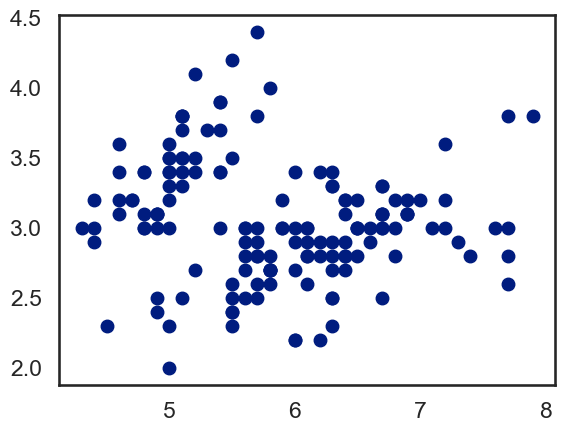

In [115]:
### Basic Scatterplot

plt.plot (data.sepal_length,
          data.sepal_width,
          ls ='', marker='o')

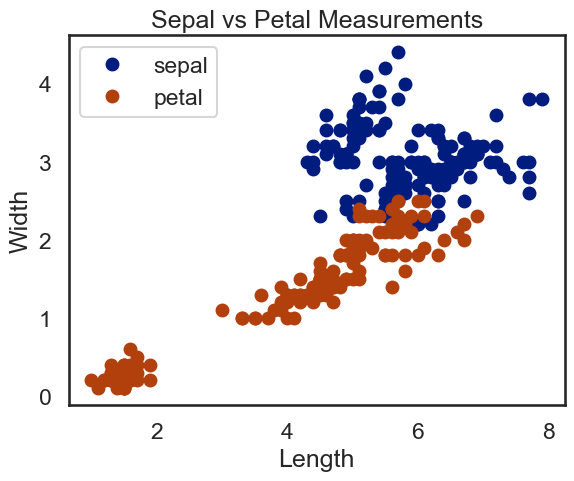

In [117]:
# Scatter plots with multiple layers

# first plot statement
plt.plot (data.sepal_length,
          data.sepal_width,
          ls ='', marker='o',
          label = 'sepal')

# second plot statement
plt.plot(data.petal_length,
         data.petal_width,
         ls = '', marker = 'o',
         label = 'petal')

plt.legend()
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Sepal vs Petal Measurements")
plt.show()

(array([ 4.,  1.,  6.,  5., 16.,  9.,  5.,  6.,  7., 14.,  7.,  9.,  6.,
        13.,  7.,  7.,  8.,  3.,  5.,  1.,  4.,  1.,  1.,  4.,  1.]),
 array([4.3  , 4.444, 4.588, 4.732, 4.876, 5.02 , 5.164, 5.308, 5.452,
        5.596, 5.74 , 5.884, 6.028, 6.172, 6.316, 6.46 , 6.604, 6.748,
        6.892, 7.036, 7.18 , 7.324, 7.468, 7.612, 7.756, 7.9  ]),
 <BarContainer object of 25 artists>)

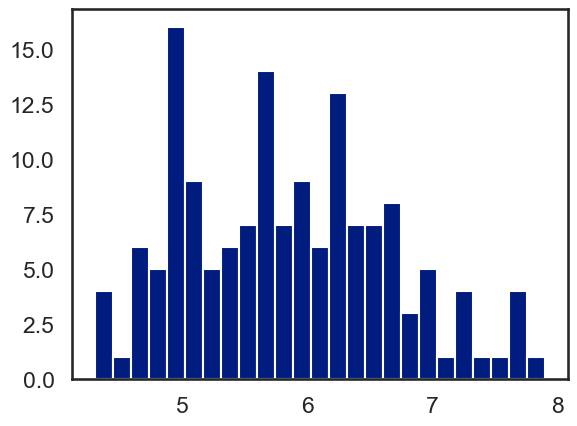

In [119]:
### Histogram
plt.hist(data.sepal_length, bins = 25)

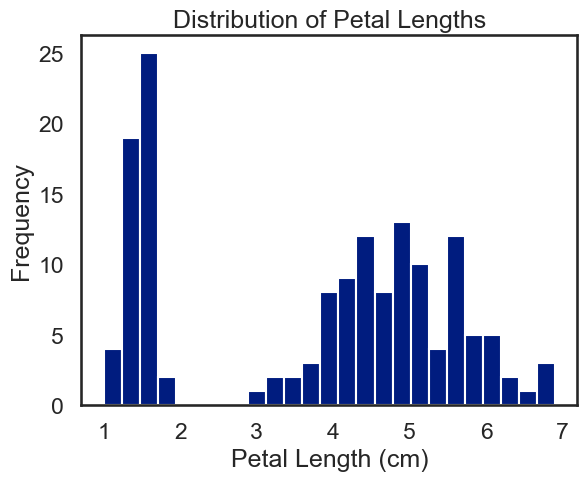

In [121]:
# using matplotlib
ax = plt.axes()
ax.hist(data.petal_length, bins = 25);

ax.set(xlabel='Petal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

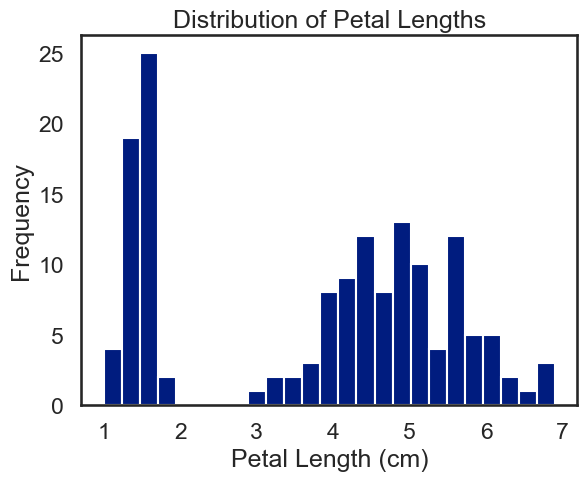

In [123]:
# using pandas
ax = data.petal_length.plot.hist(bins = 25)

ax.set(xlabel='Petal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

[Text(0.5, 0, 'xlabel'), Text(0, 0.5, 'ylabel'), Text(0.5, 1.0, 'Title')]

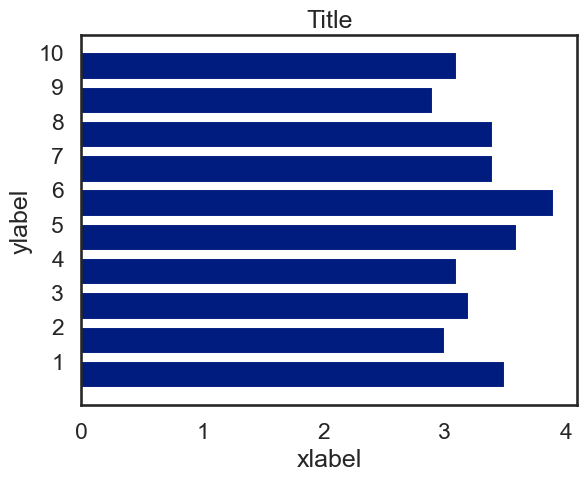

In [125]:
### Customizing Plots (more object oriented)
import numpy as np

# matplotlib syntax
fig, ax = plt.subplots()
ax.barh(np.arange(10),
        data.sepal_width.iloc[:10])

# Set position of ticks and tick labels
ax.set_yticks(np.arange(0.4,10.4,1.0))
ax.set_yticklabels(np.arange(1,11))
ax.set(xlabel = 'xlabel', ylabel = 'ylabel',
       title = 'Title')

* Create a single plot with histograms for each feature (petal_width, petal_length, sepal_width, sepal_length) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

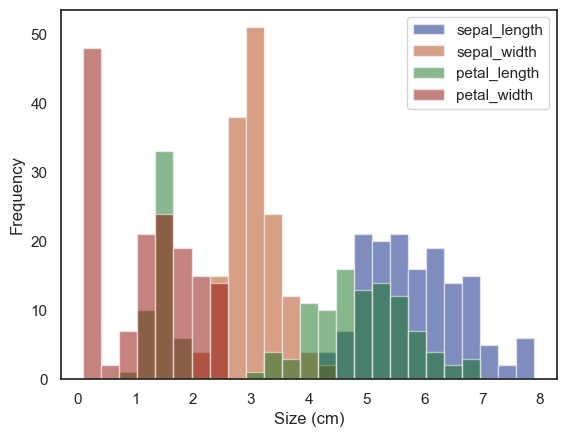

In [128]:
import seaborn as sns

sns.set_context('notebook')
ax = data.plot.hist(bins = 25, alpha = 0.5)
ax.set_xlabel('Size (cm)');

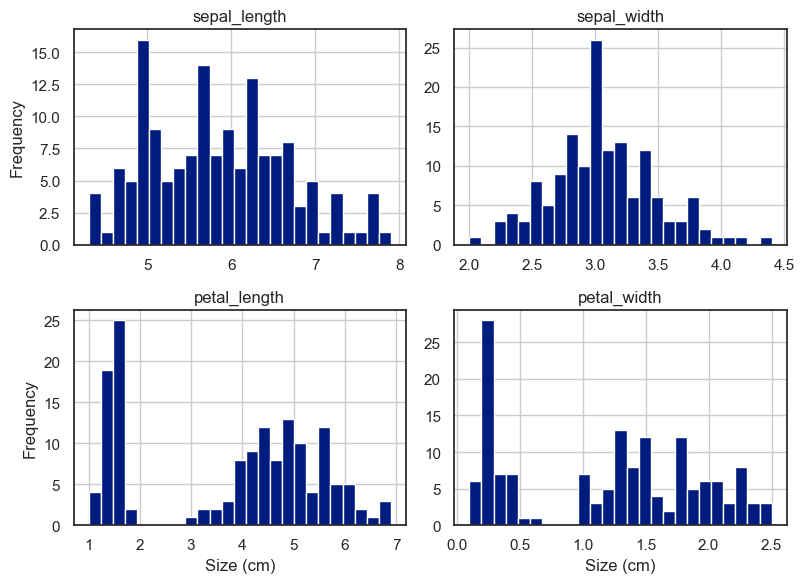

In [130]:
# To create four separate plots, use Pandas `.hist` method

axList = data.hist(bins=25, figsize=(8, 6))

# Add labels to first column and last row
for ax in axList.flatten():
    spec = ax.get_subplotspec()
    if spec.is_last_row():
        ax.set_xlabel('Size (cm)')
    if spec.is_first_col():
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

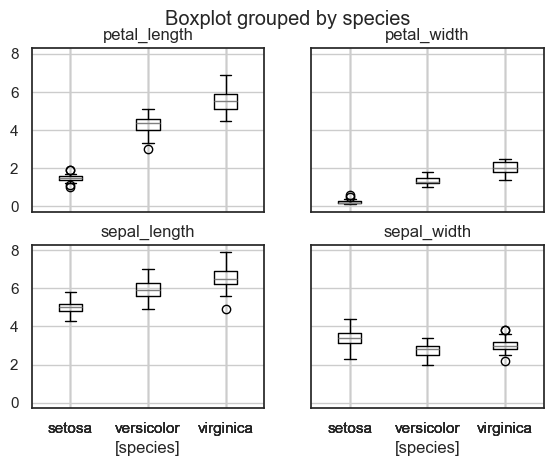

In [132]:
# four separate box plots
data.boxplot(by = 'species');

* make a single boxplot where the features are separated in the x-axis and species are colored with different hues.

In [135]:
# first we need to reshape the data so there is
# only a single measurement in each column

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


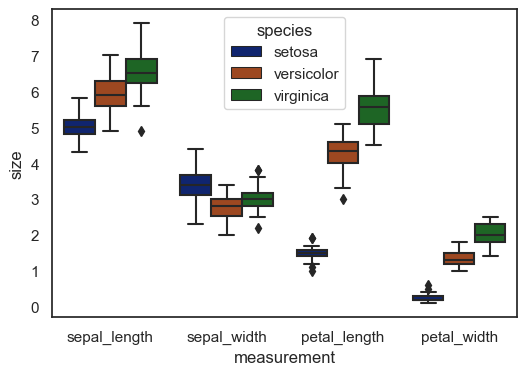

In [137]:
# Now plot the dataframe from above using Seaborn

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x = 'measurement', y = 'size',
            hue = 'species', data = plot_data);

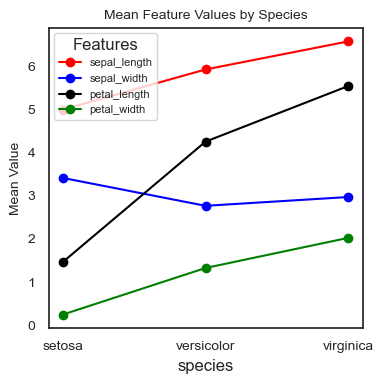

In [139]:
# Group by species and calculate mean for numeric columns
mean_values = data.groupby('species').mean()

# Line plot of means
mean_values.plot(
    kind='line',
    color=['red', 'blue', 'black', 'green'],  # 4 colors for 4 features
    figsize=(4, 4),
    marker='o'
)

plt.title("Mean Feature Values by Species", fontsize=10)
plt.ylabel("Mean Value", fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Features', fontsize=8)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` in

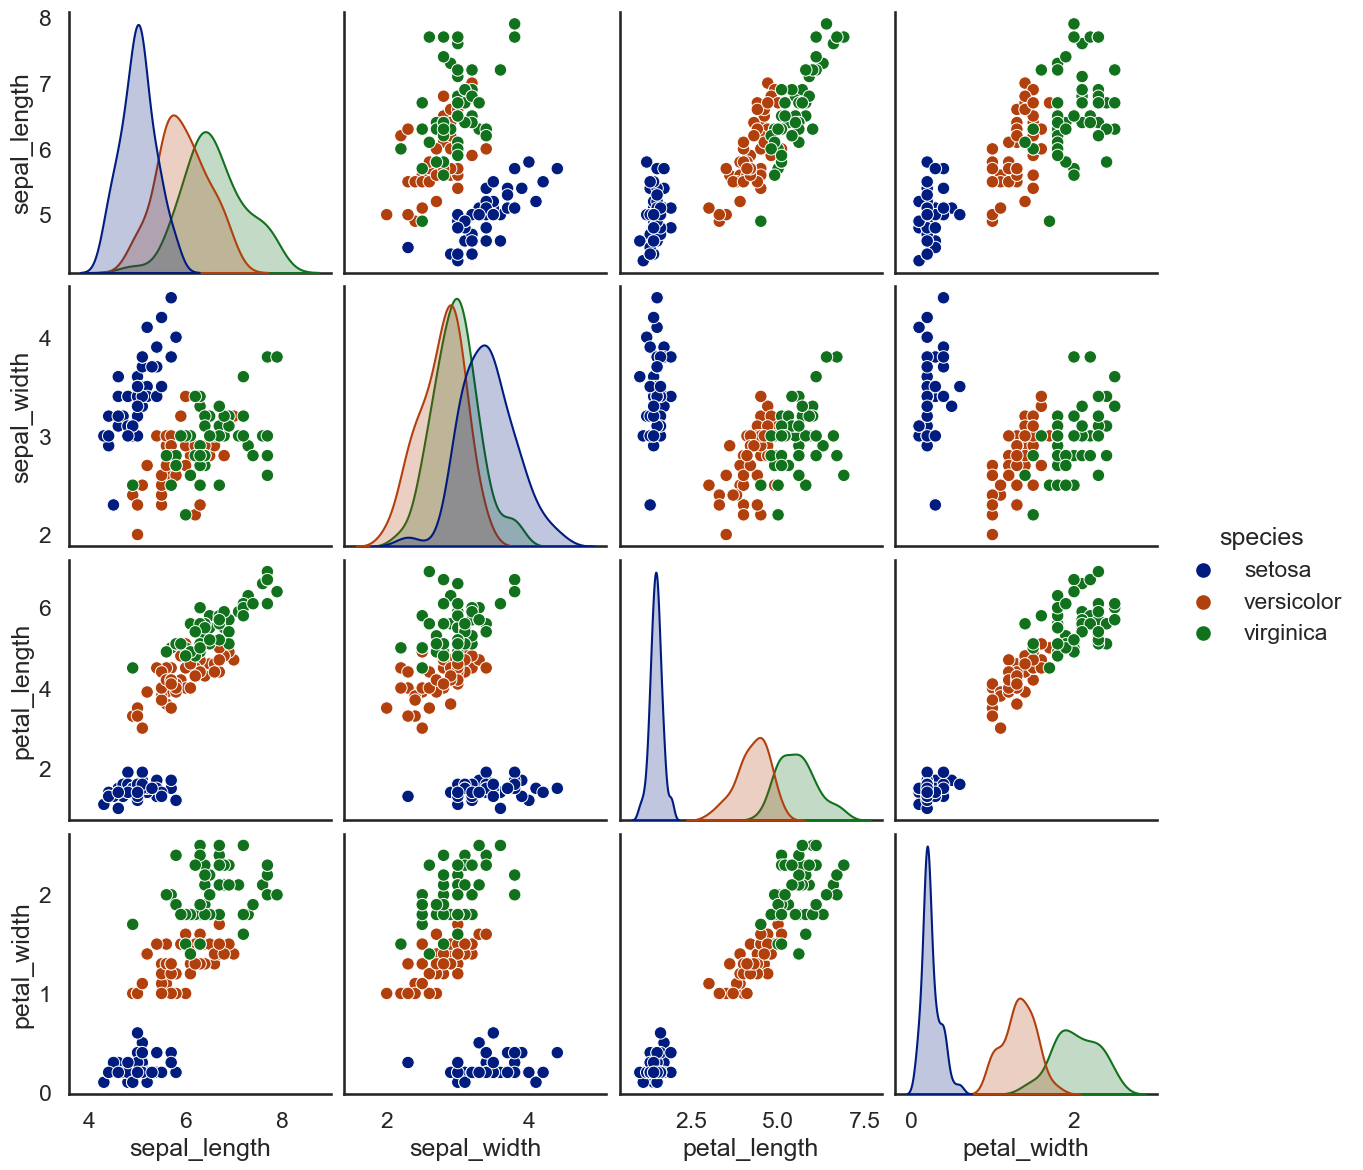

In [141]:
### Pairplot
import seaborn as sns

sns.set_context('talk')
sns.pairplot(data,
             hue = 'species', size = 3)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


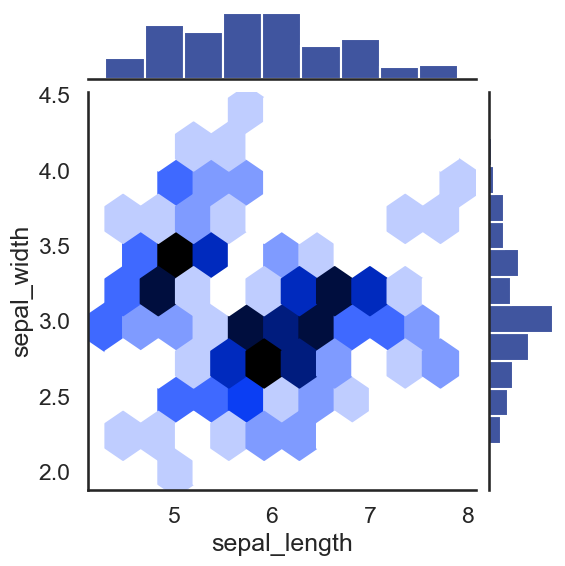

In [142]:
### Hexbin Plot
sns.jointplot(x=data['sepal_length'],
              y=data['sepal_width'],
              kind='hex')

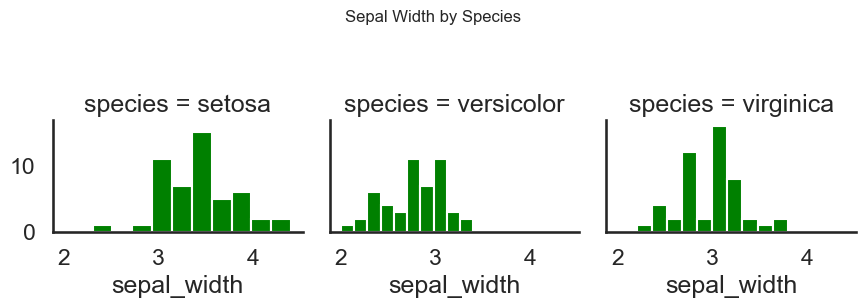

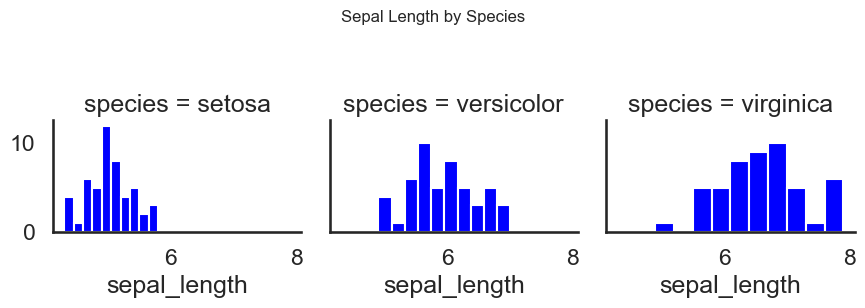

In [145]:
### Facet Grid

# First plot statement
plot1 = sns.FacetGrid(data, col='species', margin_titles=True)
plot1.map(plt.hist, 'sepal_width', color='green')
plt.suptitle("Sepal Width by Species", y=1.05, fontsize=12)
plt.tight_layout()
plt.show()

# Second plot statement
plot2 = sns.FacetGrid(data, col='species', margin_titles=True)
plot2.map(plt.hist, 'sepal_length', color='blue')
plt.suptitle("Sepal Length by Species", y=1.05, fontsize=12)
plt.tight_layout()
plt.show()

In [150]:
import pandas as pd
import plotly.express as px
import datetime 
import requests
import json

In [153]:
gasoline = pd.read_csv('/Users/cansezgin/Python-Output/canada_geo.csv')
gasoline.head()

,REF_DATE,GEO,DGUID,Type of fuel,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1979-01,"St. John's, Newfoundland and Labrador",2011S0503001,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735046,2.1,26.0,NaN,NaN,t,1
1,1979-01,"Charlottetown and Summerside, Prince Edward Is...",NaN,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735056,3.1,24.6,NaN,NaN,t,1
2,1979-01,"Halifax, Nova Scotia",2011S0503205,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735057,4.1,23.4,NaN,NaN,t,1
3,1979-01,"Saint John, New Brunswick",2011S0503310,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735058,5.1,23.2,NaN,NaN,t,1
4,1979-01,"Québec, Quebec",2011S0503421,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735059,6.1,22.6,NaN,NaN,t,1


In [159]:
gasoline.shape

(45212, 15)

In [161]:
gasoline.info

<bound method DataFrame.info of       REF_DATE                                                GEO  \
0      1979-01              St. John's, Newfoundland and Labrador   
1      1979-01  Charlottetown and Summerside, Prince Edward Is...   
2      1979-01                               Halifax, Nova Scotia   
3      1979-01                          Saint John, New Brunswick   
4      1979-01                                     Québec, Quebec   
...        ...                                                ...   
45207  2025-06                                  Whitehorse, Yukon   
45208  2025-06                 Yellowknife, Northwest Territories   
45209  2025-06                 Yellowknife, Northwest Territories   
45210  2025-06                 Yellowknife, Northwest Territories   
45211  2025-06                 Yellowknife, Northwest Territories   

                  DGUID                                       Type of fuel  \
0          2011S0503001  Regular unleaded gasoline at full se

In [163]:
gasoline.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Type of fuel', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [165]:
gasoline.isnull().sum()

REF_DATE             0
GEO                  0
DGUID             2667
Type of fuel         0
UOM                  0
UOM_ID               0
SCALAR_FACTOR        0
SCALAR_ID            0
VECTOR               0
COORDINATE           0
VALUE                0
STATUS           45212
SYMBOL           45212
TERMINATED       28648
DECIMALS             0
dtype: int64

In [169]:
# rename columns

data = (gasoline[['REF_DATE','GEO','Type of fuel','VALUE']]).rename(columns={"REF_DATE" : "DATE", "Type of fuel" : "TYPE"})
data.head()

,DATE,GEO,TYPE,VALUE
0,1979-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0
1,1979-01,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6
2,1979-01,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4
3,1979-01,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2
4,1979-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6


In [175]:
data[['City', 'Province']] = data['GEO'].str.split(',', n=1, expand=True)

data.head()

,DATE,GEO,TYPE,VALUE,City,Province
0,1979-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0,St. John's,Newfoundland and Labrador
1,1979-01,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6,Charlottetown and Summerside,Prince Edward Island
2,1979-01,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia
3,1979-01,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2,Saint John,New Brunswick
4,1979-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec


In [187]:
import pandas as pd

# Convert to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m')  # Adjusted format

# Extract month and year
data['Month'] = data['DATE'].dt.month_name().str.slice(stop=3)
data['Year'] = data['DATE'].dt.year

# View the result
print(data[['DATE', 'Month', 'Year']].head())

        DATE Month  Year
0 1979-01-01   Jan  1979
1 1979-01-01   Jan  1979
2 1979-01-01   Jan  1979
3 1979-01-01   Jan  1979
4 1979-01-01   Jan  1979


In [189]:
data.head()

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
0,1979-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0,St. John's,Newfoundland and Labrador,Jan,1979
1,1979-01-01,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6,Charlottetown and Summerside,Prince Edward Island,Jan,1979
2,1979-01-01,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia,Jan,1979
3,1979-01-01,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2,Saint John,New Brunswick,Jan,1979
4,1979-01-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec,Jan,1979


In [191]:
data.VALUE.describe()

count    45212.000000
mean        90.979846
std         38.335179
min         18.300000
25%         59.300000
50%         84.500000
75%        117.400000
max        275.500000
Name: VALUE, dtype: float64

In [193]:
data.GEO.unique().tolist()

["St. John's, Newfoundland and Labrador",
 'Charlottetown and Summerside, Prince Edward Island',
 'Halifax, Nova Scotia',
 'Saint John, New Brunswick',
 'Québec, Quebec',
 'Montréal, Quebec',
 'Ottawa-Gatineau, Ontario part, Ontario/Quebec',
 'Toronto, Ontario',
 'Thunder Bay, Ontario',
 'Winnipeg, Manitoba',
 'Regina, Saskatchewan',
 'Saskatoon, Saskatchewan',
 'Edmonton, Alberta',
 'Calgary, Alberta',
 'Vancouver, British Columbia',
 'Victoria, British Columbia',
 'Whitehorse, Yukon',
 'Yellowknife, Northwest Territories',
 'Canada']

In [195]:
# Data Filtering
calgary = data[data['GEO'] == 'Calgary, Alberta']
calgary

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
13,1979-01-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.7,Calgary,Alberta,Jan,1979
28,1979-02-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.9,Calgary,Alberta,Feb,1979
43,1979-03-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.9,Calgary,Alberta,Mar,1979
58,1979-04-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,19.1,Calgary,Alberta,Apr,1979
73,1979-05-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,19.2,Calgary,Alberta,May,1979
...,...,...,...,...,...,...,...,...
45124,2025-05-01,"Calgary, Alberta",Premium unleaded gasoline at self service fill...,156.0,Calgary,Alberta,May,2025
45125,2025-05-01,"Calgary, Alberta",Diesel fuel at self service filling stations,129.5,Calgary,Alberta,May,2025
45193,2025-06-01,"Calgary, Alberta",Regular unleaded gasoline at self service fill...,131.2,Calgary,Alberta,Jun,2025
45194,2025-06-01,"Calgary, Alberta",Premium unleaded gasoline at self service fill...,156.2,Calgary,Alberta,Jun,2025


In [197]:
sel_years = data[data['Year'] == 2000]
sel_years

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
16168,2000-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,78.0,St. John's,Newfoundland and Labrador,Jan,2000
16169,2000-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at self service fill...,74.9,St. John's,Newfoundland and Labrador,Jan,2000
16170,2000-01-01,"St. John's, Newfoundland and Labrador",Premium unleaded gasoline at full service fill...,84.5,St. John's,Newfoundland and Labrador,Jan,2000
16171,2000-01-01,"St. John's, Newfoundland and Labrador",Premium unleaded gasoline at self service fill...,81.3,St. John's,Newfoundland and Labrador,Jan,2000
16172,2000-01-01,"St. John's, Newfoundland and Labrador",Diesel fuel at full service filling stations,69.2,St. John's,Newfoundland and Labrador,Jan,2000
...,...,...,...,...,...,...,...,...
17579,2000-12-01,"Yellowknife, Northwest Territories",Premium unleaded gasoline at full service fill...,92.6,Yellowknife,Northwest Territories,Dec,2000
17580,2000-12-01,"Yellowknife, Northwest Territories",Premium unleaded gasoline at self service fill...,95.4,Yellowknife,Northwest Territories,Dec,2000
17581,2000-12-01,"Yellowknife, Northwest Territories",Diesel fuel at full service filling stations,81.9,Yellowknife,Northwest Territories,Dec,2000
17582,2000-12-01,"Yellowknife, Northwest Territories",Diesel fuel at self service filling stations,78.9,Yellowknife,Northwest Territories,Dec,2000


In [201]:
# filtering by multiple conditions
mult_loc = data[(data['GEO'] == "Toronto, Ontario")| (data['GEO'] == "Edmonton, Alberta")]
mult_loc

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
7,1979-01-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.0,Toronto,Ontario,Jan,1979
12,1979-01-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.3,Edmonton,Alberta,Jan,1979
22,1979-02-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.2,Toronto,Ontario,Feb,1979
27,1979-02-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.5,Edmonton,Alberta,Feb,1979
37,1979-03-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.2,Toronto,Ontario,Mar,1979
...,...,...,...,...,...,...,...,...
45173,2025-06-01,"Toronto, Ontario",Diesel fuel at self service filling stations,134.4,Toronto,Ontario,Jun,2025
45174,2025-06-01,"Toronto, Ontario",Household heating fuel,145.2,Toronto,Ontario,Jun,2025
45190,2025-06-01,"Edmonton, Alberta",Regular unleaded gasoline at self service fill...,127.3,Edmonton,Alberta,Jun,2025
45191,2025-06-01,"Edmonton, Alberta",Premium unleaded gasoline at self service fill...,152.5,Edmonton,Alberta,Jun,2025


In [203]:
cities = ['Calgary', 'Toronto', 'Edmonton']
CTE = data[data.City.isin(cities)]
CTE

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
7,1979-01-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.0,Toronto,Ontario,Jan,1979
12,1979-01-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.3,Edmonton,Alberta,Jan,1979
13,1979-01-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.7,Calgary,Alberta,Jan,1979
22,1979-02-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.2,Toronto,Ontario,Feb,1979
27,1979-02-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.5,Edmonton,Alberta,Feb,1979
...,...,...,...,...,...,...,...,...
45191,2025-06-01,"Edmonton, Alberta",Premium unleaded gasoline at self service fill...,152.5,Edmonton,Alberta,Jun,2025
45192,2025-06-01,"Edmonton, Alberta",Diesel fuel at self service filling stations,129.1,Edmonton,Alberta,Jun,2025
45193,2025-06-01,"Calgary, Alberta",Regular unleaded gasoline at self service fill...,131.2,Calgary,Alberta,Jun,2025
45194,2025-06-01,"Calgary, Alberta",Premium unleaded gasoline at self service fill...,156.2,Calgary,Alberta,Jun,2025


In [211]:
# the price of the 'household heating fuel', in Vancouver, in 1990.

price_heating = data[( data['Year'] ==  1990) & 
(data['TYPE'] == "Household heating fuel") & 
(data['City']=='Vancouver')]
price_heating

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
2192,1990-01-01,"Vancouver, British Columbia",Household heating fuel,32.4,Vancouver,British Columbia,Jan,1990
2304,1990-02-01,"Vancouver, British Columbia",Household heating fuel,33.7,Vancouver,British Columbia,Feb,1990
2416,1990-03-01,"Vancouver, British Columbia",Household heating fuel,34.0,Vancouver,British Columbia,Mar,1990
2528,1990-04-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Apr,1990
2640,1990-05-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,May,1990
2752,1990-06-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Jun,1990
2864,1990-07-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Jul,1990
2976,1990-08-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Aug,1990
3088,1990-09-01,"Vancouver, British Columbia",Household heating fuel,36.7,Vancouver,British Columbia,Sep,1990
3200,1990-10-01,"Vancouver, British Columbia",Household heating fuel,41.8,Vancouver,British Columbia,Oct,1990


In [222]:
# the price of the 'household heating fuel', in Vancouver, in the years of 1979 and 2021.

houshold_heating = data[( data['Year'] <=  1979) | 
(data['Year'] ==  2021) & 
(data['TYPE'] == "Household heating fuel") & 
(data['City']=='Vancouver')]
houshold_heating

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
0,1979-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0,St. John's,Newfoundland and Labrador,Jan,1979
1,1979-01-01,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6,Charlottetown and Summerside,Prince Edward Island,Jan,1979
2,1979-01-01,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia,Jan,1979
3,1979-01-01,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2,Saint John,New Brunswick,Jan,1979
4,1979-01-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec,Jan,1979
...,...,...,...,...,...,...,...,...
41979,2021-08-01,"Vancouver, British Columbia",Household heating fuel,136.5,Vancouver,British Columbia,Aug,2021
42049,2021-09-01,"Vancouver, British Columbia",Household heating fuel,140.9,Vancouver,British Columbia,Sep,2021
42119,2021-10-01,"Vancouver, British Columbia",Household heating fuel,148.6,Vancouver,British Columbia,Oct,2021
42189,2021-11-01,"Vancouver, British Columbia",Household heating fuel,149.1,Vancouver,British Columbia,Nov,2021


In [224]:
geo = data.groupby('GEO')
geo.ngroups

19

In [226]:
group_year = data.groupby(['Year'])['VALUE'].mean()
group_year

Year
1979     23.604444
1980     28.068750
1981     38.002604
1982     44.701563
1983     47.904688
1984     50.442708
1985     53.899479
1986     48.405208
1987     49.758333
1988     49.217188
1989     51.700000
1990     55.048735
1991     56.527041
1992     54.633832
1993     54.334734
1994     54.247899
1995     56.177451
1996     58.134110
1997     59.182062
1998     56.247246
1999     58.743362
2000     72.207839
2001     72.403107
2002     70.312147
2003     75.541667
2004     82.960452
2005     96.328743
2006    101.173810
2007    105.225840
2008    123.263725
2009     96.943487
2010    106.338725
2011    126.763936
2012    130.347549
2013    129.642040
2014    133.084405
2015    110.315238
2016    101.769167
2017    112.836905
2018    129.352738
2019    125.660357
2020    107.520952
2021    136.311905
2022    189.525833
2023    174.588810
2024    168.571429
2025    161.221190
Name: VALUE, dtype: float64

In [230]:
gaso_price = data.groupby(['Year', 'City'])['VALUE'].median()
gaso_price

Year  City                        
1979  Calgary                          19.15
      Charlottetown and Summerside     25.45
      Edmonton                         18.70
      Halifax                          24.00
      Montréal                         23.25
                                       ...  
2025  Vancouver                       182.55
      Victoria                        184.55
      Whitehorse                      172.40
      Winnipeg                        146.50
      Yellowknife                     161.90
Name: VALUE, Length: 843, dtype: float64

In [234]:
gaso_price_month = data.groupby(['Month'])['VALUE'].median()
gaso_price_month

Month
Apr    83.90
Aug    85.65
Dec    82.90
Feb    82.65
Jan    82.10
Jul    84.60
Jun    86.50
Mar    84.10
May    84.90
Nov    85.40
Oct    86.20
Sep    86.70
Name: VALUE, dtype: float64

* plot the prices of gasoline in all cities during 1979 - 2021.

In [240]:
price_bycity = data.groupby(['Year', 'GEO'])['VALUE'].mean().reset_index(name ='Value').round(2)

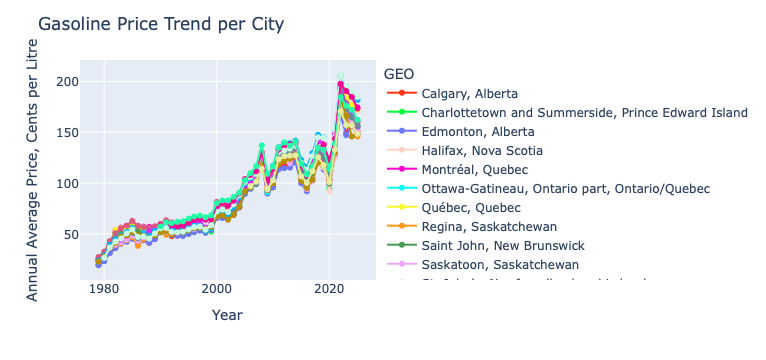

In [244]:
fig = px.line(price_bycity
                   ,x='Year', y = "Value", 
                   color = "GEO", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Gasoline Price Trend per City",
    xaxis_title="Year",
    yaxis_title="Annual Average Price, Cents per Litre")
fig.show()

* plot the average monthly prices of gasoline in Toronto for the year of 2021.

In [247]:
mon_trend = data[(data['Year'] ==  2021) & (data['GEO'] == "Toronto, Ontario")]
group_month = mon_trend.groupby(['Month'])['VALUE'].mean().reset_index().sort_values(by="VALUE")

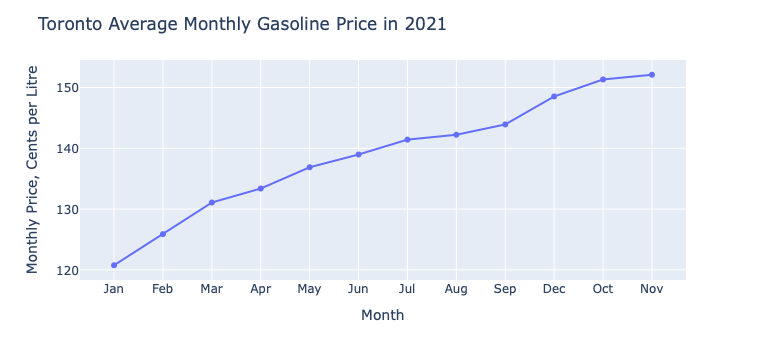

In [249]:
fig = px.line(group_month,
                   x='Month', y = "VALUE")
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Toronto Average Monthly Gasoline Price in 2021",
    xaxis_title="Month",
    yaxis_title="Monthly Price, Cents per Litre")
fig.show()

* use plotly.express or other libraries, to plot the annual average gasoline price, per year, per gasoline type.

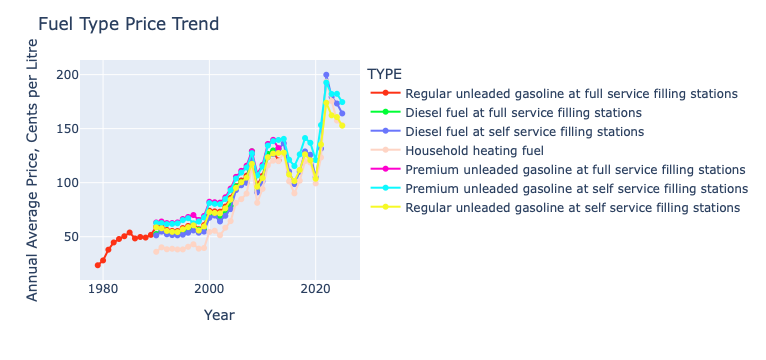

In [252]:
type_gas = data.groupby(['Year', 'TYPE'])['VALUE'].mean().reset_index(name ='Type').round(2)
fig = px.line(type_gas,
                   x='Year', y = "Type", 
                   color = "TYPE", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Fuel Type Price Trend",
    xaxis_title="Year",
    yaxis_title="Annual Average Price, Cents per Litre")
fig.show()

*  use the animated time frame to show the trend of gasoline prices over time.

In [255]:
bycity = data.groupby(['Year', 'City'])['VALUE'].mean().reset_index(name ='Value').round(2)
bycity.head()

,Year,City,Value
0,1979,Calgary,19.61
1,1979,Charlottetown and Summerside,25.82
2,1979,Edmonton,19.08
3,1979,Halifax,24.52
4,1979,Montréal,23.86


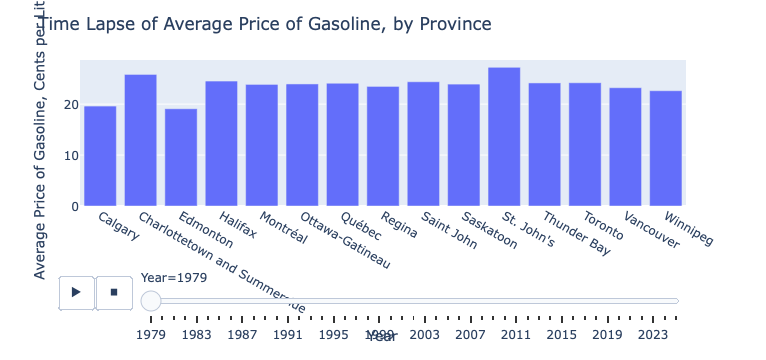

In [261]:
fig = px.bar(bycity,  
            x='City', y = "Value", animation_frame="Year")
fig.update_layout(
    title="Time Lapse of Average Price of Gasoline, by Province",
    xaxis_title="Year",
    yaxis_title="Average Price of Gasoline, Cents per Litre")

fig.show()